# 周三任务
1. 使用pytorch搭建神经网络模型，实现对KMNIST数据集的训练。
https://pytorch.org/vision/stable/generated/torchvision.datasets.KMNIST.html#torchvision.datasets.KMNIST
2. 尝试调整模型结构（变更神经元数量，增加隐藏层）来提升模型预测的准确率
3. 调试超参数，观察学习率和批次大小对训练的影响。

#### 2 调整模型结构 观察训练结果

In [49]:
# 导入必要包
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor     # 转换图像数据为张量
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader  # 数据加载器

In [50]:
# 定义超参数
LR = 1e-2
epochs = 20
BATCH_SIZE = 128

In [51]:
# 数据集加载
train_data = KMNIST(root='./data', train=True, download=True, 
                          transform=ToTensor())
test_data = KMNIST(root='./data', train=False, download=True,
                         transform=ToTensor())


/opt/conda/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [52]:
trian_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)  # shuffle=True表示打乱数据
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

In [53]:
def train_iter(epochs, model, trian_dl):
    train_hist = []

    # 损失函数&优化器
    loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
    # 优化器（模型参数更新）
    optimizer = torch.optim.SGD(model.parameters(), lr=LR)

    for epoch in range(epochs):
        # 提取训练数据
        for data, target in trian_dl:
            # 前向运算
            output = model(data.reshape(-1, 784))
            # 计算损失
            loss = loss_fn(output, target)
            # 反向传播
            optimizer.zero_grad()  # 所有参数梯度清零
            loss.backward()     # 计算梯度（参数.grad）
            optimizer.step()    # 更新参数

        print(f'Epoch:{epoch} Loss: {loss.item()}')
        train_hist.append(loss.item())

    return train_hist

In [54]:
def draw_train_hist(hist):
    import matplotlib.pyplot as plt
    plt.plot(hist)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

In [68]:
# 测试
def test_acc(test_dl, model):
    correct = 0
    total = 0
    with torch.no_grad():  # 不计算梯度
        for data, target in test_dl:
            output = model(data.reshape(-1, 784))
            _, predicted = torch.max(output, 1)  # 返回每行最大值和索引
            total += target.size(0)  # size(0) 等效 shape[0]
            correct += (predicted == target).sum().item()
    return correct/total*100

In [56]:
# 定义模型
model1 = nn.Sequential(
    nn.Linear(784, 512),
    nn.Sigmoid(),
    nn.Linear(512, 256),
    nn.Sigmoid(),
    nn.Linear(256, 10)
)

In [57]:
model2 = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

In [58]:
model3 = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

In [59]:
model1_hist = train_iter(epochs, model1, trian_dl)
model2_hist = train_iter(epochs, model2, trian_dl)
model3_hist = train_iter(epochs, model3, trian_dl)

Epoch:0 Loss: 2.2871298789978027
Epoch:1 Loss: 2.3009469509124756
Epoch:2 Loss: 2.2866337299346924
Epoch:3 Loss: 2.2773892879486084
Epoch:4 Loss: 2.268956422805786
Epoch:5 Loss: 2.2522239685058594
Epoch:6 Loss: 2.2154109477996826
Epoch:7 Loss: 2.158107042312622
Epoch:8 Loss: 2.0997369289398193
Epoch:9 Loss: 1.9422701597213745
Epoch:10 Loss: 1.8766423463821411
Epoch:11 Loss: 1.857861876487732
Epoch:12 Loss: 1.8261622190475464
Epoch:13 Loss: 1.83073091506958
Epoch:14 Loss: 1.597525954246521
Epoch:15 Loss: 1.5427742004394531
Epoch:16 Loss: 1.5707203149795532
Epoch:17 Loss: 1.5021095275878906
Epoch:18 Loss: 1.501488208770752
Epoch:19 Loss: 1.1758896112442017
Epoch:0 Loss: 1.7710024118423462
Epoch:1 Loss: 1.080915927886963
Epoch:2 Loss: 0.9220564365386963
Epoch:3 Loss: 0.7506638169288635
Epoch:4 Loss: 0.5091680884361267
Epoch:5 Loss: 0.4681362807750702
Epoch:6 Loss: 0.403826504945755
Epoch:7 Loss: 0.37287092208862305
Epoch:8 Loss: 0.4811061918735504
Epoch:9 Loss: 0.4551278352737427
Epoch:10

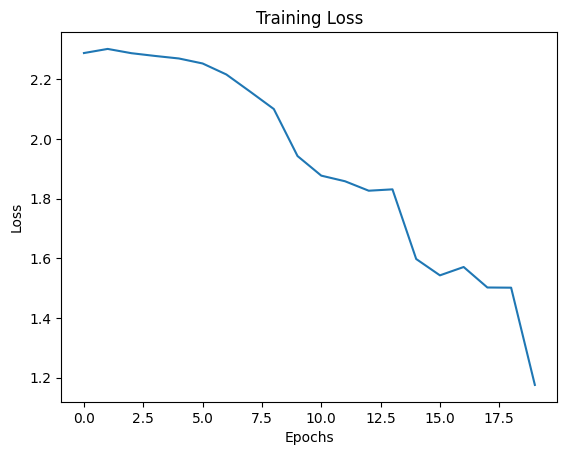

In [60]:
draw_train_hist(model1_hist)

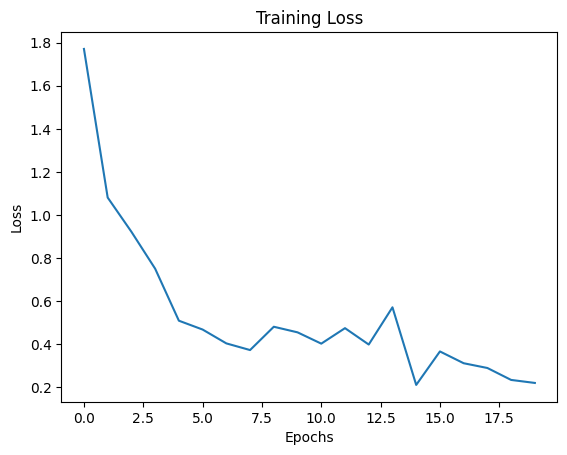

In [61]:
draw_train_hist(model2_hist)

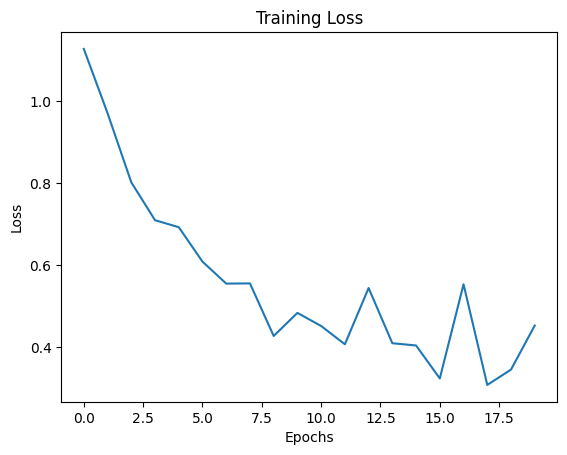

In [62]:
draw_train_hist(model3_hist)

In [69]:
print('Model1 Acc:', test_acc(test_dl, model1))
print('Model2 Acc:', test_acc(test_dl, model2))
print('Model3 Acc:', test_acc(test_dl, model3))

Model1 Acc: 47.980000000000004
Model2 Acc: 80.2
Model3 Acc: 77.79
